# Titanic Survival Predictive Modeling

# Domain Knowledge


Survival: Target column has two values (0 = No, 1 = Yes).

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

Sex: male or female.

Age: Age of passengers in years.

Sibsp: number of siblings / spouses aboard the Titanic.

Parch: number of parents / children aboard the Titanic.

Ticket: Ticket number.

Fare: Passenger fare.

Cabin: Cabin number.

Embarked: Port of Embarkation has three values (C = Cherbourg, Q = Queenstown, S = Southampton)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [82]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.shape

(891, 12)

In [85]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#  Data Preprocessing 

In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

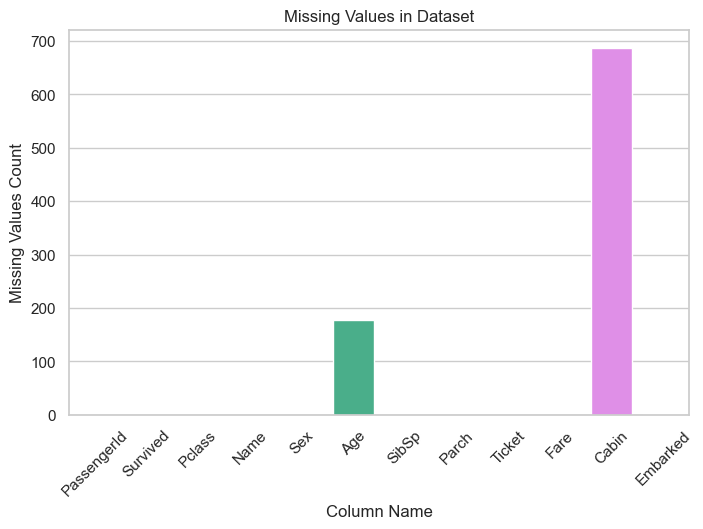

In [88]:
missing_values = df.isnull().sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title("Missing Values in Dataset")
plt.xlabel("Column Name")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=45)
plt.show()


# Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

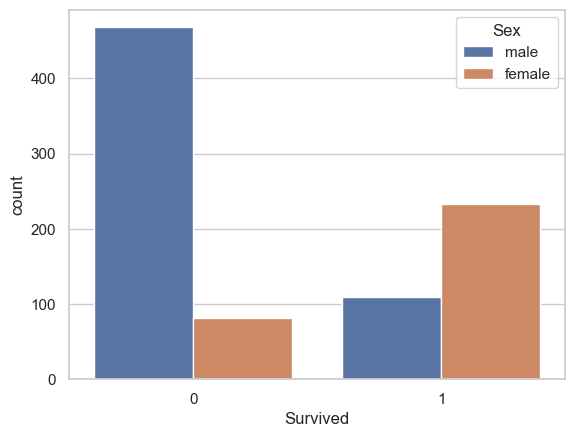

In [89]:
sns.countplot(x = "Survived",hue = "Sex", data = df)

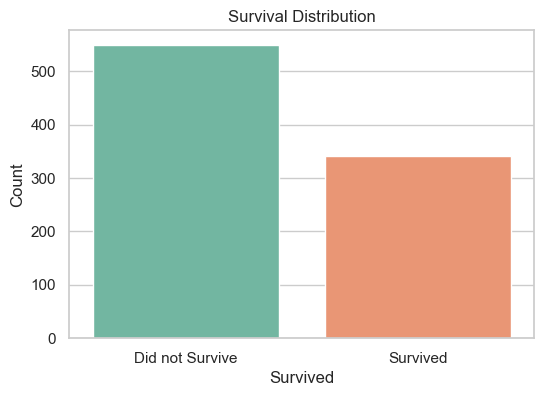

In [90]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
survival_counts = df['Survived'].value_counts()
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette="Set2")
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Did not Survive', 'Survived'])
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

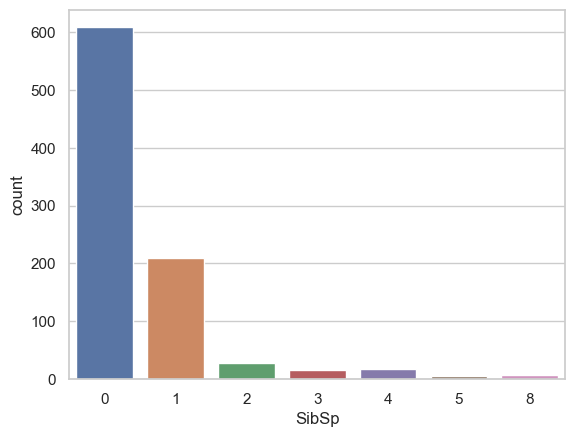

In [91]:
#number of siblings
sns.countplot(x="SibSp" ,data = df)

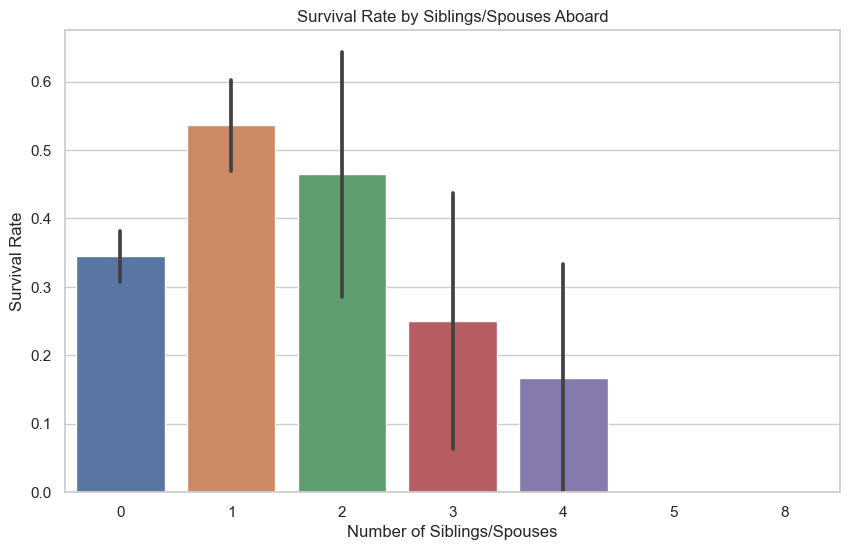

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='SibSp', y='Survived')
plt.title('Survival Rate by Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')

plt.show()


<AxesSubplot:xlabel='Survived', ylabel='count'>

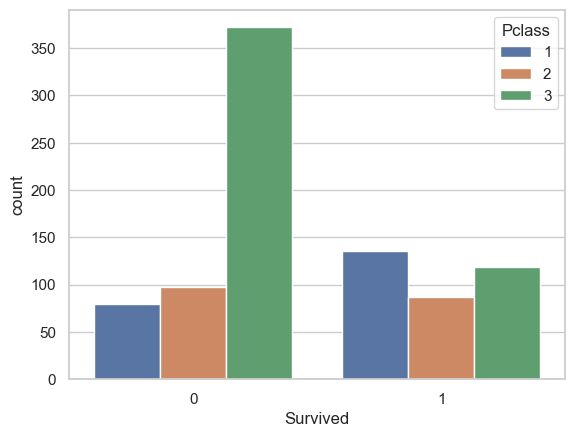

In [93]:
#cheacking class  
sns.countplot(x = "Survived",hue = "Pclass", data = df)

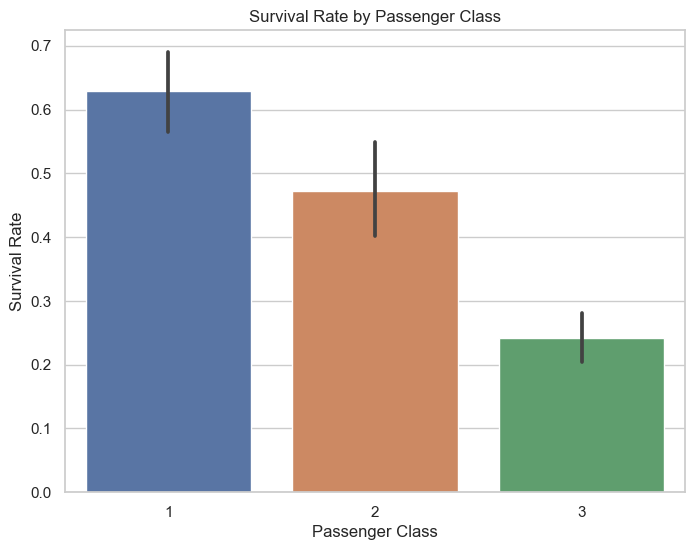

In [94]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

plt.show()


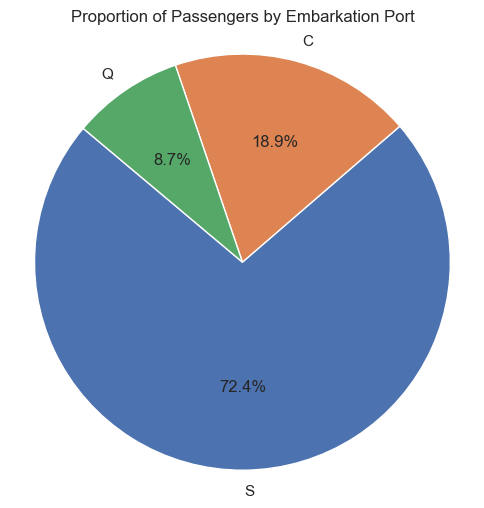

In [95]:
embarked_counts = df['Embarked'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Passengers by Embarkation Port')
plt.axis('equal')  
plt.show()


In [96]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

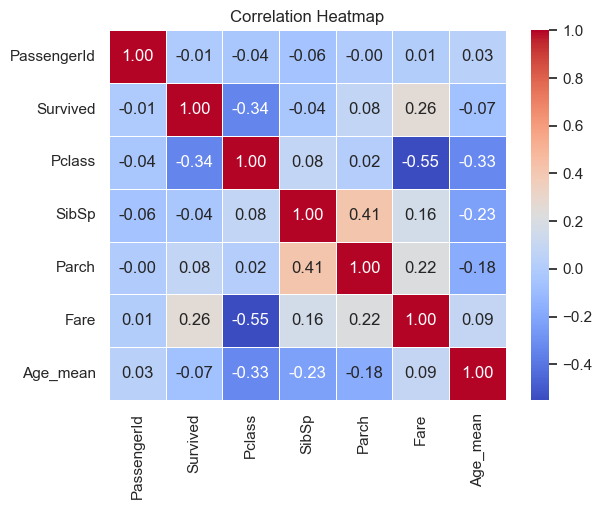

In [116]:
# plot heatmap of correlation of dataframe
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Heandling with missing values

In [98]:
age_mean = df['Age'].mean()
df['Age_mean'] = df['Age'].fillna(age_mean)
most_freq_val = df['Embarked'].mode().iloc[0]
df['Embarked_imputed'] = df['Embarked'].fillna(most_freq_val)
df =df.drop(['Embarked', 'Age'], axis=1)


Removing some columns

After conducting a thorough analysis, certain columns have been identified as not contributing significantly to our models. Hence, we will proceed with removing these columns from the dataset to enhance the model's performance and efficiency. The modified dataset will be as follows:

In [99]:
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)

First separate object columns and make a second df then
encode object columns

In [100]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
cat_cols = df[["Embarked_imputed", "Sex"]]
encoded_cols = encoder.fit_transform(cat_cols).toarray()
encoded_cols = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out())

#### Drop repeated values and concat new encoded columns 

In [101]:
df = df.drop(['Embarked_imputed', 'Sex'], axis=1)
new_df = pd.concat([df, encoded_cols], axis=1)
new_df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age_mean,Embarked_imputed_C,Embarked_imputed_Q,Embarked_imputed_S,Sex_female,Sex_male
0,1,0,3,1,0,7.2500,22.0,0.0,0.0,1.0,0.0,1.0
1,2,1,1,1,0,71.2833,38.0,1.0,0.0,0.0,1.0,0.0
2,3,1,3,0,0,7.9250,26.0,0.0,0.0,1.0,1.0,0.0
3,4,1,1,1,0,53.1000,35.0,0.0,0.0,1.0,1.0,0.0
4,5,0,3,0,0,8.0500,35.0,0.0,0.0,1.0,0.0,1.0


#  Model Building

In [102]:
y = new_df['Survived']
X = new_df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Testing different model to see which model is siutable for our data set

# Logistic Regression

In [103]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
ypred_logReg = logReg.predict(X_test)
acc_logReg = round(accuracy_score(ypred_logReg, y_test) * 100, 2)
print(f'Accuracy: {acc_logReg}')
report_logReg = classification_report(y_test, ypred_logReg)
print("Classification Report for Logistic Regression:")
print(report_logReg)

Accuracy: 81.01
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       114
           1       0.75      0.71      0.73        65

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


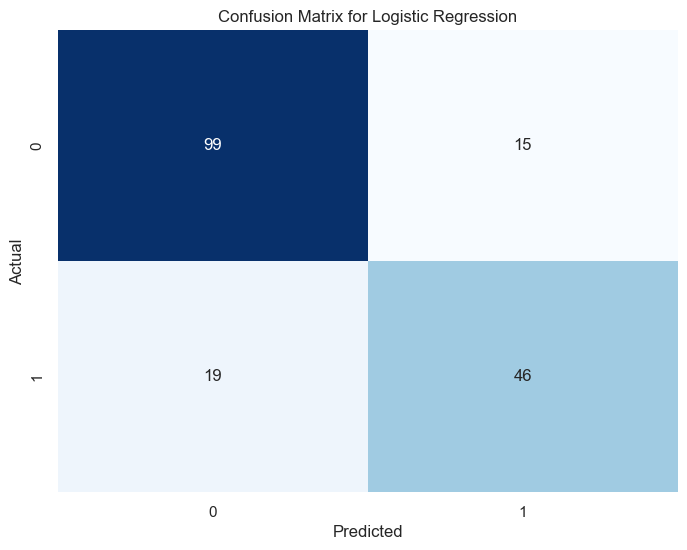

In [105]:
confusion = confusion_matrix(y_test, ypred_logReg)

# Create and display the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Decision tree

In [106]:
decisiontree = DecisionTreeClassifier(random_state=123)
decisiontree.fit(X_train, y_train)
ypred_decisiontree = decisiontree.predict(X_test)

In [107]:
acc_decisiontree = round(accuracy_score(ypred_decisiontree, y_test) * 100, 2)
print(f'Accuracy: {acc_decisiontree}')
report_decisiontree = classification_report(y_test, ypred_decisiontree)
print("Classification Report for Decision Tree Classifier:")
print(report_decisiontree)


Accuracy: 71.51
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.83      0.69      0.76       114
           1       0.58      0.75      0.66        65

    accuracy                           0.72       179
   macro avg       0.71      0.72      0.71       179
weighted avg       0.74      0.72      0.72       179



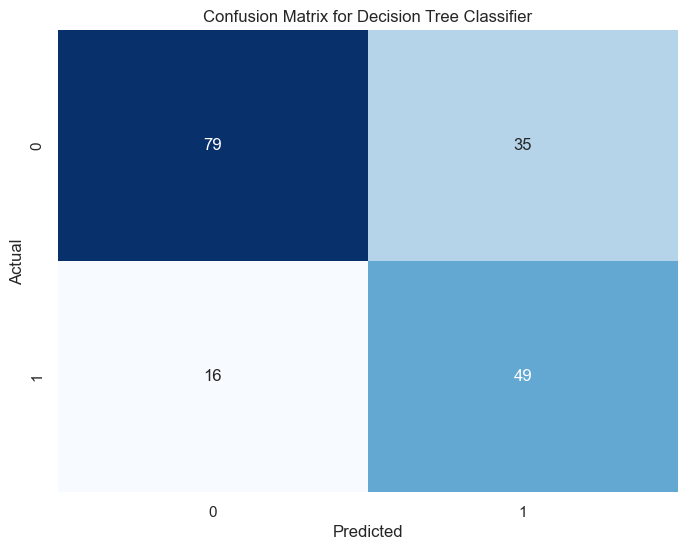

In [108]:
confusion = confusion_matrix(y_test, ypred_decisiontree)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Gradient boosting

In [109]:
gbk = GradientBoostingClassifier(random_state=123)
gbk.fit(X_train, y_train)
ypred_gbk = gbk.predict(X_test)

In [110]:
acc_gbk = round(accuracy_score(ypred_gbk, y_test) * 100, 2)
print(f'Accuracy: {acc_gbk}')
report_gbk = classification_report(y_test, ypred_gbk)
print("Classification Report for Gradient Boosting Classifier:")
print(report_gbk)

Accuracy: 84.36
Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       114
           1       0.78      0.78      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



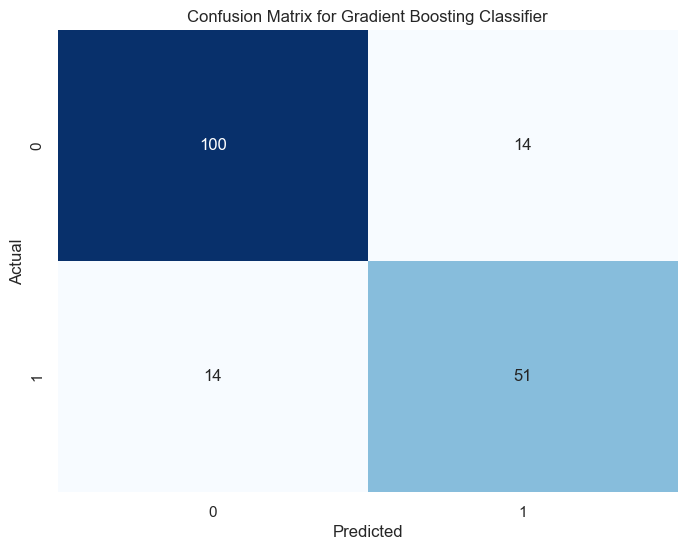

In [111]:
confusion = confusion_matrix(y_test, ypred_gbk)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Conclusion

Our analysis of the Titanic dataset, employing Logistic Regression, Decision Tree Classifier, and Gradient Boosting Classifier, revealed varying levels of predictive performance. Among these models, the Gradient Boosting Classifier stands out with the highest accuracy of 84.36% and robust precision and recall values for both classes. This suggests its suitability for predicting passenger survival in the Titanic dataset. 

### Save predicited data to CSV 

In [113]:
output = pd.DataFrame(ypred_logReg, columns=["prediction"])
output.to_csv('Titanic_prediction.csv', index=False)